## 知识补充：
## 数据预处理：
### 1. Pandas删除数据的几种情况:
* <https://www.cnblogs.com/cocowool/p/8421997.html>
* df.dropna() 删除空值，用`df.dropna?`查看具体应用和函数定义


### 2. python 格式化输出：
* `print("I'm %s. I'm %d year old" % ('Vamei', 99))`

### 3. dataframe 的某些处理：

* 计算dataframe某列的某个值的频率：先把它变成list ,然后用count(值) `list(air_data.NMHC).count(-200)`
* 遍历dataframe 的各种情况:<https://blog.csdn.net/sinat_29675423/article/details/87972498>
* df.loc()
* 新建dataframe: 
    * 二维列表： 指定列表和索引`df = pd.DataFrame([[1,2,3],[4,5,6]],index=['row1','row2'],columns=['c1','c2','c3'])`
    * 字典
* 获取列名：
      *  `list(df.columns)`
      *   `[column for column in df]` 
      *  `list(df)`
      *  `dfname.columns.values.tolist() `
* 行名：
     *  `dfname._stat_axis.values.tolist()`
* dataframe 的值的修改：
     * 直接通过索引是不行的：如 `dataset[0]['A']=11或则dataset.loc[0]['A']=11`,它是将值传到一个元组中，所以不能修改,会报错
     * 所以只能用 `dataset.loc[0,'A']=11`前面是行，后面是列，
     * 链接 <https://blog.csdn.net/qq_33711966/article/details/79902276>
     
     
### 4.数值处理：
* 编码：<https://blog.csdn.net/m0_37324740/article/details/77169771>

### 5. 时间转化成时间戳
* 
```python
import time
dt = dataset1.loc[i,'date']
timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
#Y 必须大写#转换成时间戳
timestamp = time.mktime(timeArray)
dataset1.loc[i,'date']=timestamp
```

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### 读取数据

In [129]:
air_data = pd.read_excel('AirQualityUCI2.xlsx')
air_data.head()

['Date',
 'Time',
 'CO',
 'PT08.S1(CO)',
 'NMHC',
 'C6H6',
 'PT08.S2(NMHC)',
 'Nox',
 'PT08.S3(NOx)',
 'NO2',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

### 缺失值，离群点，冗余

In [77]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO               9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC             9357 non-null int64
C6H6             9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
Nox              9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2              9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [78]:
air_data.describe()

,CO,PT08.S1(CO),NMHC,C6H6,PT08.S2(NMHC),Nox,PT08.S3(NOx),NO2,PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [79]:
list(air_data.NMHC).count(-200)
for i, row in air_data.iteritems():
    a = list(air_data[i]).count(-200)
    print("%s counts -200 is %d"%(i,a))

Date counts -200 is 0
Time counts -200 is 0
CO counts -200 is 1683
PT08.S1(CO) counts -200 is 366
NMHC counts -200 is 8443
C6H6 counts -200 is 366
PT08.S2(NMHC) counts -200 is 366
Nox counts -200 is 1639
PT08.S3(NOx) counts -200 is 366
NO2 counts -200 is 1642
PT08.S4(NO2) counts -200 is 366
PT08.S5(O3) counts -200 is 366
T counts -200 is 366
RH counts -200 is 366
AH counts -200 is 366


#### 缺失值处理
* 查看NMHC和CO 在每天同一个时间段，浓度随日期的变化，由于它们的分布变化随时间变化不可肉眼估计。前面几幅图和后面几幅图随时间的变化无法预估
* 所以对比两种处理方法：
    * 1. 将所有缺失值换成对应时间点的平均值
    * 2. 将所有的缺失值去掉

[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]


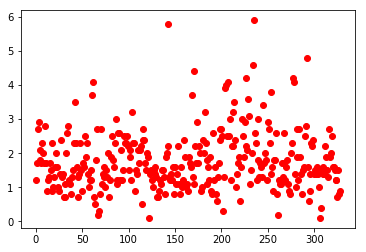

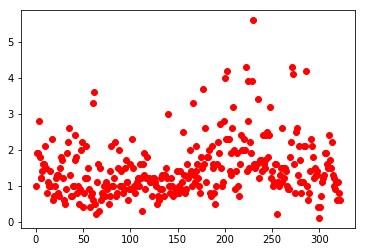

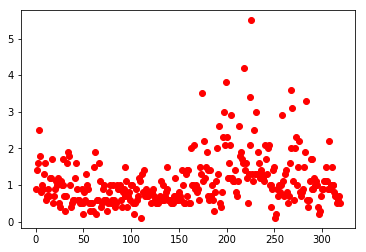

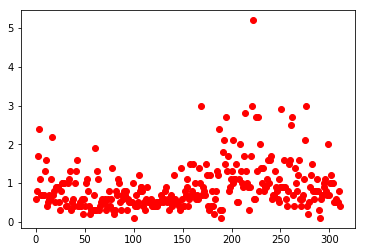

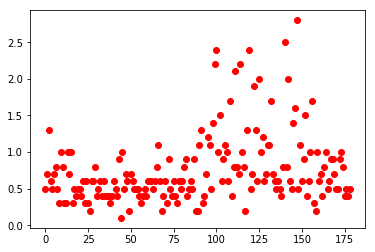

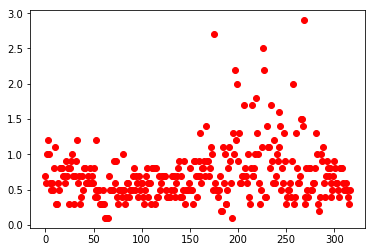

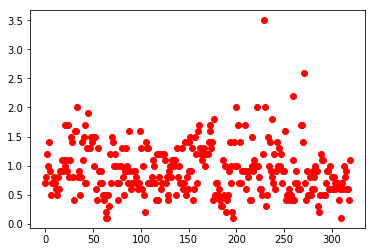

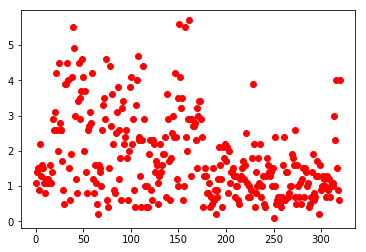

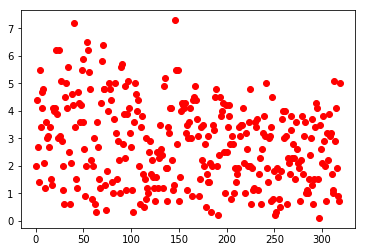

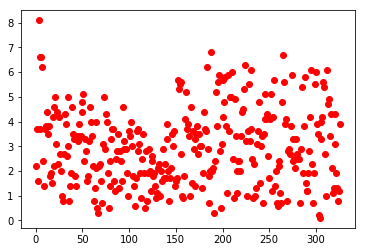

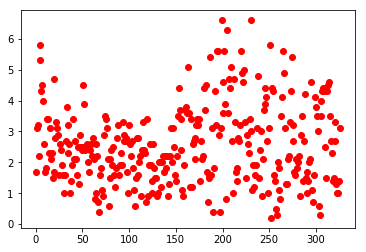

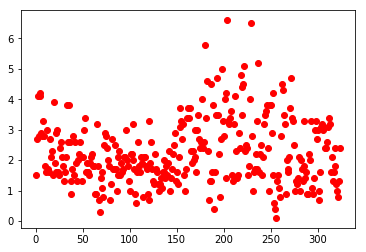

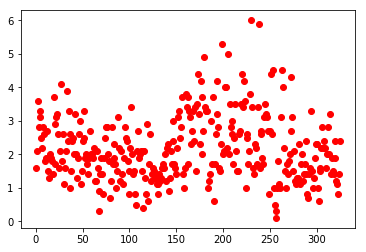

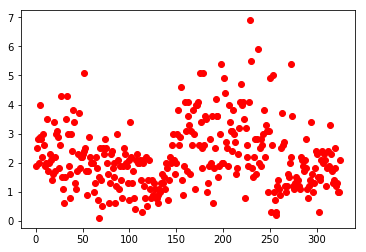

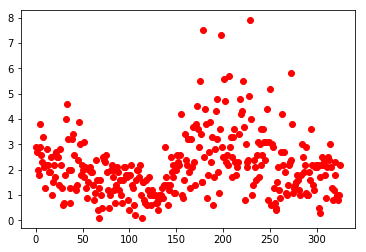

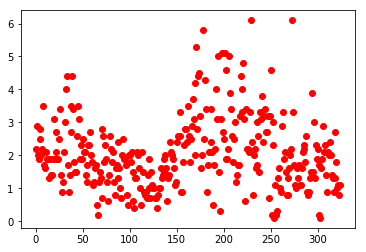

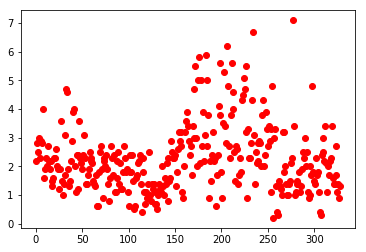

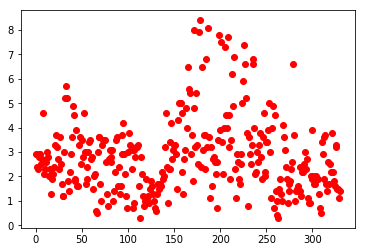

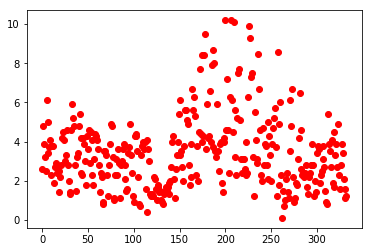

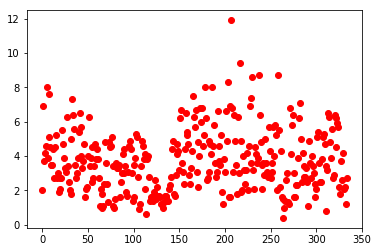

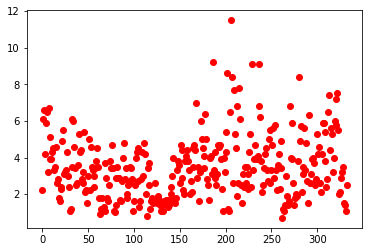

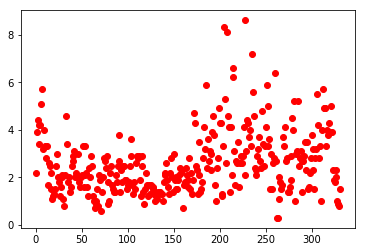

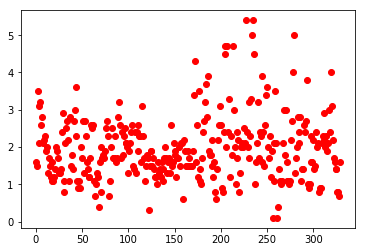

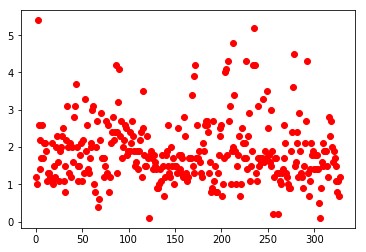

In [80]:

Time_values = air_data['Time'].unique()
Time_values.sort()
list(Time_values)
print(Time_values)
for m in range(24):
    Time_set=air_data.loc[air_data['Time']==Time_values[m]]
    TNMHC=list(Time_set.loc[Time_set['CO']!=-200]['CO'])
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot([i for i in range(len(TNMHC))],TNMHC, 'ro',label='line 1',linewidth=2)
    plt.show()

[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]


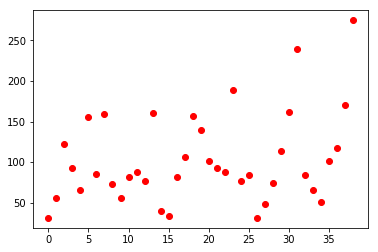

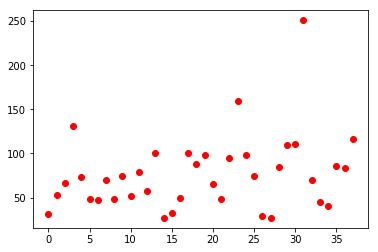

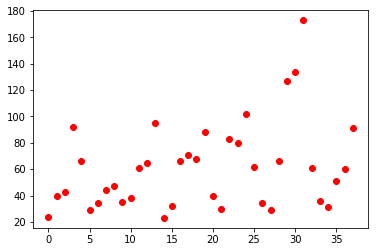

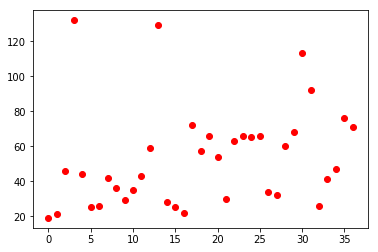

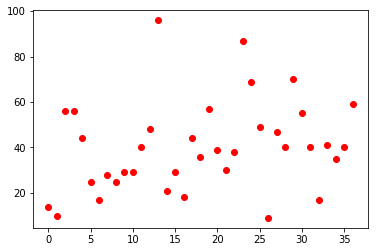

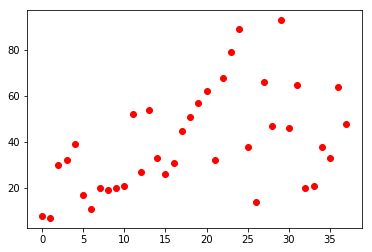

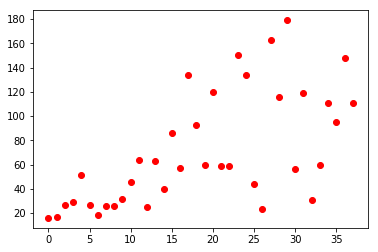

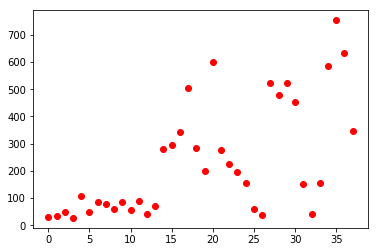

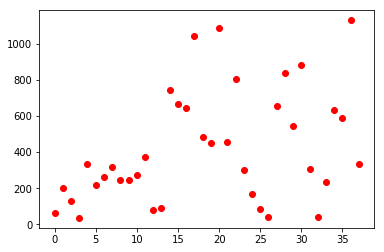

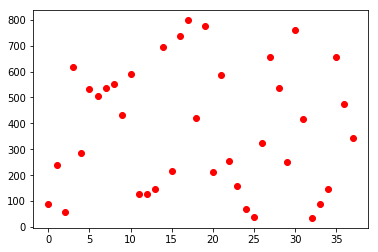

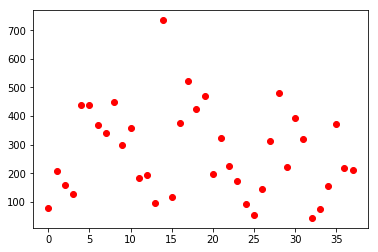

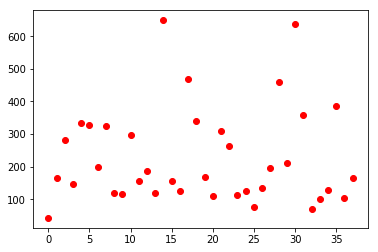

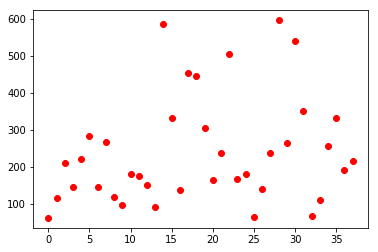

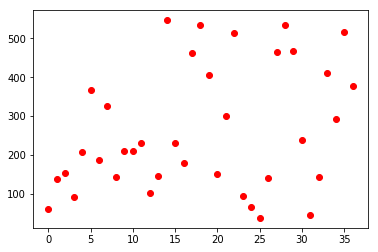

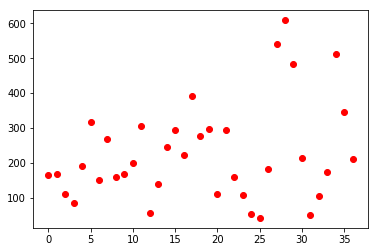

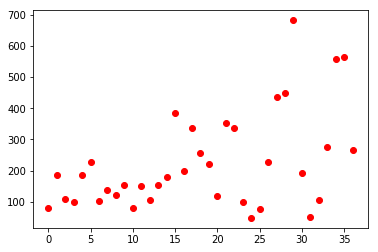

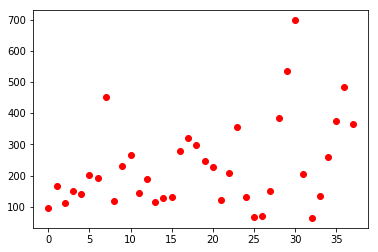

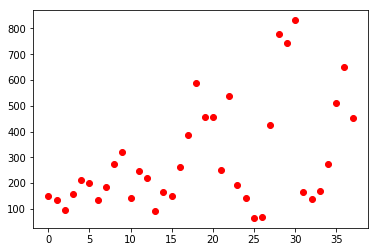

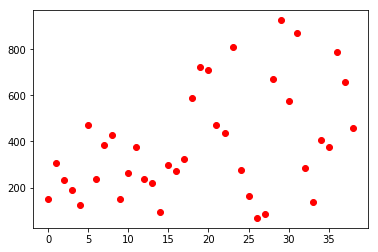

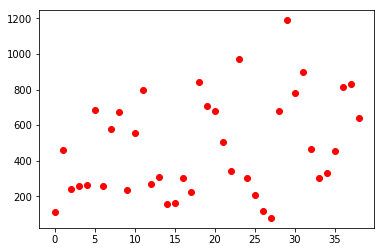

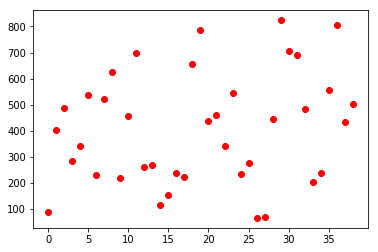

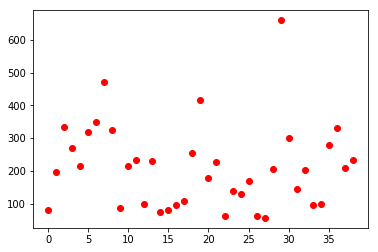

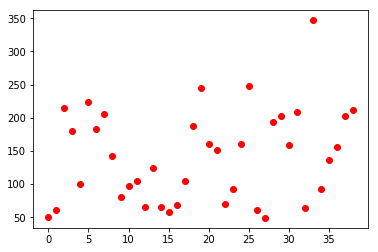

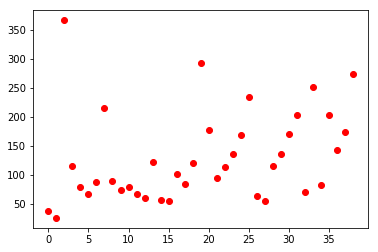

In [81]:
Time_values = air_data['Time'].unique()
Time_values.sort()
list(Time_values)
print(Time_values)
for m in range(24):
    Time_set=air_data.loc[air_data['Time']==Time_values[m]]
    TNMHC=list(Time_set.loc[Time_set['NMHC']!=-200]['NMHC'])
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot([i for i in range(len(TNMHC))],TNMHC, 'ro',label='line 1',linewidth=2)
    plt.show()

#### 所有的缺失值都被标记为-200, -200 的处理情况
* 1. 缺失用每一天对应时间点的平均数据来补充
    * 求每个时段，每个属性的平均数值
        * 生成一个`dataframe: MeanOfTime`
        * 外循环：遍历所有时段 
        * 内循环： 遍历每个时段的所有情况，相加，去掉-200的情况，求均值
    * 填充：
        * 遍历所有的null即-200的值
        * 填充： `该值为=MeanOfTime['Time']['属性']`

In [82]:
Time_values = air_data['Time'].unique()
Time_values.sort()
list(Time_values)
print(len(Time_values))
print(Time_values)
Column=[i for i in Time_set][2:]
MeanOfTime = pd.DataFrame([[],[]])
for i in Time_values:
    Time_set=air_data.loc[air_data['Time']==i]
    count=0
    sum_=0
    for j in Column:
        mean = Time_set.loc[Time_set[j]!=-200][j].mean()
        MeanOfTime.loc[i,j]=mean
MeanOfTime = MeanOfTime[2:]
MeanOfTime

24
[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]


,CO,PT08.S1(CO),NMHC,C6H6,PT08.S2(NMHC),Nox,PT08.S3(NOx),NO2,PT08.S4(NO2),PT08.S5(O3),T,RH,AH
00:00:00,1.786018,1064.890457,103.128205,7.686748,869.193772,190.402381,848.464830,103.286310,1387.259185,998.947357,16.105802,55.422245,1.053521
01:00:00,1.467802,1003.697415,76.973684,5.992678,795.848485,157.323653,912.806150,90.491018,1329.264037,902.787210,15.727941,56.546212,1.052243
02:00:00,1.099062,943.779778,61.868421,4.378676,715.428667,118.572892,1001.903111,75.415361,1274.432667,802.711333,15.284489,57.818844,1.048371
03:00:00,0.888462,903.992908,52.972973,3.379422,658.394504,114.500000,1081.045434,80.080769,1237.998670,733.196587,14.833134,59.035749,1.041981
04:00:00,0.758659,884.625553,40.189189,2.915537,630.803492,81.132831,1120.709770,58.596386,1221.366269,700.030504,14.433134,60.210522,1.037550
05:00:00,0.712934,891.966180,40.078947,3.068492,641.287798,86.794294,1106.982759,59.596096,1231.487179,713.191424,14.185809,60.913064,1.035069
06:00:00,0.921562,952.966977,71.447368,4.757573,731.121897,125.678443,999.206782,71.720060,1301.764184,813.931073,13.984929,61.472451,1.031611
07:00:00,1.810903,1113.295434,235.605263,10.398085,943.971631,224.604192,829.688830,94.682036,1508.816489,1047.943484,14.283954,60.385328,1.033270
08:00:00,2.823750,1238.192598,421.552632,15.894304,1130.396277,344.711854,701.370789,121.245732,1691.968972,1261.496232,15.200488,57.509220,1.037383
09:00:00,2.972477,1221.428351,381.236842,14.758763,1104.886023,361.303593,706.872575,130.864264,1626.688051,1278.070767,16.744246,52.897310,1.042038


In [83]:
for i in air_data:
    print(i)

Date
Time
CO
PT08.S1(CO)
NMHC
C6H6
PT08.S2(NMHC)
Nox
PT08.S3(NOx)
NO2
PT08.S4(NO2)
PT08.S5(O3)
T
RH
AH


#### 将缺失值的条目从中去掉
* 这样NMHC 浓度就无法运用了,所以当要用到这个浓度时，直接用它的传感器的值代替
* 处理后的数据集叫做：DEL_SET
* 处理方法：
    * 遍历所有的除去HMHC的所有的列，将每一列的缺失值去掉

In [136]:
Del_airset = air_data
for i in air_data:
    if i=='NMHC':
        continue
    Del_airset = Del_airset.loc[Del_airset[i]!=-200] 
for i, row in Del_airset.iteritems():
    a = list(Del_airset[i]).count(-200)
    print("%s counts -200 is %d"%(i,a))
dropna?
Del_airset.loc?

Date counts -200 is 0
Time counts -200 is 0
CO counts -200 is 0
PT08.S1(CO) counts -200 is 0
NMHC counts -200 is 6114
C6H6 counts -200 is 0
PT08.S2(NMHC) counts -200 is 0
Nox counts -200 is 0
PT08.S3(NOx) counts -200 is 0
NO2 counts -200 is 0
PT08.S4(NO2) counts -200 is 0
PT08.S5(O3) counts -200 is 0
T counts -200 is 0
RH counts -200 is 0
AH counts -200 is 0
Object `dropna` not found.



#### 数据归一化：为了防止数据的数量级有太大差异
* 将找出最大的传感数据，将传感数据归一化
* 处理方法：
    * 遍历所有的real data 找出其中最大的一个值，然后让所有的数据除以它然后再乘以10
    * 同样的方法处理传感器的值
    * 同样的方法处理时间和温度

In [1]:
# # 时间
# import time
# Time_values = air_data['Time'].unique()
# Time_values.sort()
# #Del_airset = Del_airset.loc[Del_airset['Time']=]
# type(Time_values[0])
# 
# Del_airset['Time']


In [86]:
# #for i, row in Del_airset.iteritems():
# max_ = max(Del_airset['CO'])
# features = Del_airset
# features = features.drop('Date', axis=1)
# features = features.drop('Time', axis=1)
# for i in features:
#     max_ = max(features[i])
#     for j in range(len(features[i])):
#         features[i][j]= features[i][j]/max_

In [2]:

from sklearn.cross_validation import train_test_split
features = Del_airset
labels = Del_airset['CO'].values# target
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('NMHC', axis=1)
features = features.drop('CO', axis=1)
features = features.values#把dataframe变成二维数组

D:\install2\anacdot\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'Del_airset' is not defined

In [ ]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
print(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Predicted values:", regressor.predict(X_test))
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

Object `features.dropna` not found.
